# Progress Report 1

In [1]:
#load necessary apckages
import pickle
import pandas as pd
import plotly.express as px
import matplotlib as plt

In [2]:
#Load the dataframes from the pickle object
dfs_pickle = open("dfs.pkl", "rb")
dfs = pickle.load(dfs_pickle)

# Data Exploration

Because of my first round of data exploration, I've decided to use the LanguageTable, FormTable and ParamterTable from the CLICs [sqlite database](https://github.com/clics/clics3/blob/master/clics3.sqlite.zip). Below I will explore the data further.

1. [LanguageTable](#1.-LanguageTable)
2. [ParameterTable](#2.-ParameterTable)
3. [FormTable](#3.-FormTable)
4. [Ideas for Analysis](#Ideas-for-Analysis)

In [16]:
l_df = dfs['LanguageTable']
p_df = dfs['ParameterTable']
f_df = dfs['FormTable']

After loading the data, I will look into the individual DataFrames.

### 1. LanguageTable

In [4]:
l_df.head()

,ID,Name,Glottocode,Glottolog_Name,ISO639P3code,Macroarea,Latitude,Longitude,Family,dataset_ID,...,Coverage,Type,Date,Transcriber,Short_Name,Region,Culture,Description,Orthography,Comment
0,Venetianstd,Venetian-std,vene1258,Venetian,vec,Eurasia,45.503581,12.214167,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,None
1,Hindistd,Hindi-std,hind1269,Hindi,hin,Eurasia,25.000000,77.000000,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,None
2,Romagnolstd,Romagnol-std,roma1328,Romagnol,rgn,Eurasia,44.234900,11.718900,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,None
3,Latinstd,Latin-std,lati1261,Latin,lat,Eurasia,41.902600,12.450200,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,None
4,Galicianstd,Galician-std,gali1258,Galician,glg,Eurasia,42.244600,-7.534300,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,None


In [38]:
# Many of the columns won't be useful, such as Subfamily, since there aren't very many non-null entries.
# The Macroarea, lat/longitude and Family columns have a good amount of entries, though. However,
# they do differ in number from one another slightly.
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                3248 non-null   object  
 1   Name              3248 non-null   object  
 2   Glottocode        3164 non-null   object  
 3   Glottolog_Name    2614 non-null   object  
 4   ISO639P3code      2820 non-null   object  
 5   Macroarea         2961 non-null   object  
 6   Latitude          2684 non-null   float64 
 7   Longitude         2684 non-null   float64 
 8   Family            3163 non-null   object  
 9   dataset_ID        3248 non-null   object  
 10  ChineseName       68 non-null     object  
 11  SubGroup          220 non-null    object  
 12  DialectGroup      43 non-null     object  
 13  author            10 non-null     object  
 14  url               10 non-null     object  
 15  typedby           10 non-null     object  
 16  checkedby         0 non-

In [44]:
#Convert the language family into a factor to use to color the map or do categorical prediction
l_df['Family_factor'] = l_df['Family'].astype('category')
l_df.head()

,ID,Name,Glottocode,Glottolog_Name,ISO639P3code,Macroarea,Latitude,Longitude,Family,dataset_ID,...,Type,Date,Transcriber,Short_Name,Region,Culture,Description,Orthography,Comment,Family_factor
0,Venetianstd,Venetian-std,vene1258,Venetian,vec,Eurasia,45.503581,12.214167,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,Indo-European
1,Hindistd,Hindi-std,hind1269,Hindi,hin,Eurasia,25.000000,77.000000,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,Indo-European
2,Romagnolstd,Romagnol-std,roma1328,Romagnol,rgn,Eurasia,44.234900,11.718900,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,Indo-European
3,Latinstd,Latin-std,lati1261,Latin,lat,Eurasia,41.902600,12.450200,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,Indo-European
4,Galicianstd,Galician-std,gali1258,Galician,glg,Eurasia,42.244600,-7.534300,Indo-European,logos,...,None,None,None,None,None,None,None,None,None,Indo-European


I used this website to help me make this map: [RADAR: Plotly](https://www.datacamp.com/tutorial/making-map-in-python-using-plotly-library-guide)

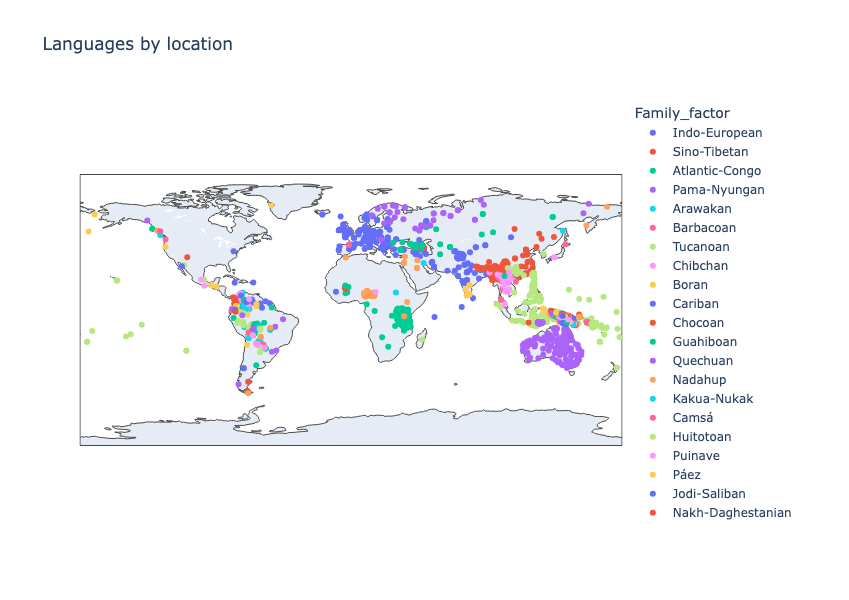

In [20]:
#Shows the languages where they're located according to the data, colored by language family
#Hold mouse over dot to see lanuage name, you can also pan and zoom
fig = px.scatter_geo(l_df, lat='Latitude', lon='Longitude', color='Family_factor',
                     hover_name='Name', #size=... could use to show number of concepts per lang,
                     title='Languages by location', width=870, height=600)
fig.show()

We can see that, for the most part, language families are pretty close geographically, which makes sense. There are some, such as Afro-Asiatic or Austronesian, that cover a considerable amount of land and find themselves stretching across other langauges families, which may lead to influence across language families. We can also see the sheer amount of language families included in this dataset, as well as the fact that the languages included show a reasonable representation of the world's languages, instead of being just Indo-European or all concentrated in Europe and Asia as some datasets are wont to be.

In [22]:
l_df.ID.count()

3248

There are 3,248 languages represented in this dataset.

In [24]:
#Number of languages per macroarea represented (all)
l_df.Macroarea.value_counts()

Macroarea
Papunesia        1606
Eurasia           743
Africa            231
South America     194
Australia         168
North America      19
Name: count, dtype: int64

In [37]:
#Number of languages per language family represented: top 15 families (200+ represented)
l_df.Family.value_counts()[:15]

Family
Nuclear Trans New Guinea    560
Austronesian                548
Indo-European               266
Sino-Tibetan                227
Pama-Nyungan                176
Atlantic-Congo              155
Nakh-Daghestanian           107
Timor-Alor-Pantar           101
Afro-Asiatic                 75
Uralic                       42
Tai-Kadai                    41
Austroasiatic                39
Lakes Plain                  32
Nuclear Torricelli           28
Eastern Trans-Fly            28
Name: count, dtype: int64

### 2. ParameterTable

In [17]:
#Just concepts, their glosses, and categorizations of the type of concept.
p_df.head()

,ID,Name,Concepticon_ID,Concepticon_Gloss,dataset_ID,Ontological_Category,Semantic_Field,Chinese_Gloss,Number,Spanish,Gloss_in_digital_source,NorthEuralex_Gloss,DIACL_ID,SrcId,Description,Indonesian,Elicitation_Notes,Core_Set,Comment
0,3_earthgroundsoil,"earth=ground, soil",1228,EARTH (SOIL),logos,Person/Thing,The physical world,None,None,None,None,None,None,None,None,None,None,None,None
1,4_dust,dust,2,DUST,logos,Person/Thing,The physical world,None,None,None,None,None,None,None,None,None,None,None,None
2,5_mud,mud,640,MUD,logos,Person/Thing,The physical world,None,None,None,None,None,None,None,None,None,None,None,None
3,7_mountainhill,"mountain, hill",2118,MOUNTAIN OR HILL,logos,Person/Thing,The physical world,None,None,None,None,None,None,None,None,None,None,None,None
4,8_cliffprecipice,"cliff, precipice",618,PRECIPICE,logos,Person/Thing,The physical world,None,None,None,None,None,None,None,None,None,None,None,None


In [48]:
len(set(p_df.ID))

18177

In [49]:
len(set(p_df.Concepticon_ID))

2919

There are different "ID" values in the ParameterTable for the same Concepticon_ID because there are different datasets they're pulling the same concepts from. The ID column maps to the FormTable, so there will need to be checks to see if the Concepticon_ID is the same, not just Parameter_ID.

Overall, there are 2,919 concepts that could be colexified. For concepts to be colexified, they must have the same form in the FormTable, but different Concepticon_IDs.

In [50]:
#Broad categorization of concept
p_df.Ontological_Category.value_counts()

Ontological_Category
Person/Thing      10195
Action/Process     4777
Property           2144
Other              1297
Number              479
Classifier           62
Name: count, dtype: int64

In [51]:
#More specific characterization, could use GloVe vectors here to cluster, would likely have to go off
#of the concepticon gloss to get the vector representation for the concepts.
p_df.Semantic_Field.value_counts()

Semantic_Field
The body                          2568
Animals                           1610
Basic actions and technology      1386
The physical world                1210
Spatial relations                 1195
Food and drink                    1108
Agriculture and vegetation        1084
Motion                            1020
Kinship                           1011
Sense perception                   873
Time                               812
Quantity                           798
Emotions and values                590
Cognition                          546
Clothing and grooming              504
Possession                         471
Speech and language                418
The house                          407
Social and political relations     336
Warfare and hunting                326
Miscellaneous function words       205
Modern world                       189
Religion and belief                161
Law                                125
                                     1
Name: coun

### 3. FormTable

In [18]:
#Includes the form, Language_ID to link it to the LanguageTable, 
#and Parameter_ID to link it to the ParameterTable.
f_df.head()

,ID,Local_ID,Language_ID,Parameter_ID,Value,Form,Segments,Comment,Cognacy,Loan,...,salience,effect,contact_situation,original_script,diacl_id,meaning,meaning_note,transliteration,ipa,Local_Orthography
0,Venetianstd-350_friday-1,None,Venetianstd,350_friday,divendres,divendres,,None,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,Hindistd-350_friday-1,None,Hindistd,350_friday,शुक्रवार,शुक्रवार,,None,None,NaN,...,None,None,None,None,None,None,None,None,None,None
2,Romagnolstd-350_friday-1,None,Romagnolstd,350_friday,vèner,vèner,,None,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,Latinstd-350_friday-1,None,Latinstd,350_friday,Venerisdies,Venerisdies,,None,None,NaN,...,None,None,None,None,None,None,None,None,None,None
4,Galicianstd-350_friday-1,None,Galicianstd,350_friday,venres,venres,,None,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [101]:
#Number of unique forms: 1,462,115 (wow!)
len(set(f_df.ID))

1462115

In [102]:
#Somehow there are more unique parameter IDs than IDs in the ParameterTable...
len(set(f_df.Parameter_ID))

20676

In [113]:
#see the value counts for parameter IDs that are in FormTable but not in ParameterTable
#~ means NOT, so NOT IN
f_df.Parameter_ID[ ~f_df.Parameter_ID.isin(p_df.ID) ].value_counts()

Parameter_ID
you                         536
1408_thicket                249
574_fly                     246
face-forehead               206
to-call-out                 160
                           ... 
899926_thelimabeans           1
899927_thelupin               1
899929_themamuelchoique       1
89993_themango                1
999906_thecorrugatediron      1
Name: count, Length: 2499, dtype: int64

In [114]:
#Verify they're actually missing... sad
#might have to just use 'f_df.Parameter_ID[ f_df.Parameter_ID.isin(p_df.ID) ]' for analysis
p_df[p_df.ID == 'you']

,ID,Name,Concepticon_ID,Concepticon_Gloss,dataset_ID,Ontological_Category,Semantic_Field,Chinese_Gloss,Number,Spanish,Gloss_in_digital_source,NorthEuralex_Gloss,DIACL_ID,SrcId,Description,Indonesian,Elicitation_Notes,Core_Set,Comment


In [103]:
#most common ... least common concepts
f_df.Parameter_ID.value_counts()

Parameter_ID
water                 1554
eye                   1530
fire                  1522
head                  1505
sun                   1483
                      ... 
2499919_youdual          1
399944_thechipmunk       1
1999944_mate             1
399935_theplover         1
299916_thespouse         1
Name: count, Length: 20676, dtype: int64

In [85]:
#Top 20 languages with most forms: hard to interpret due to ID scheme
top_langs = f_df.Language_ID.value_counts().reset_index().rename(columns={"index": "value"})
top_langs[:20]


,Language_ID,count
0,192,4912
1,709,4034
2,211,2700
3,818,2590
4,235,2586
5,Otomi,2558
6,234,2545
7,188,2489
8,181,2420
9,319,2386


In [99]:
#not sure how to get rid of the duplicate column yet during the merge. easily done after
#top 20 languages by number of forms again, with names
top_langs_names = pd.merge(l_df[['Name','ID']], top_langs, left_on='ID', right_on='Language_ID', how='inner')
top_langs_names = top_langs_names[['Name','count']]
top_langs_names.sort_values(by=['count'], ascending=False)[:20]

,Name,count
395,Old High German,4912
588,Telugu,4034
414,Sanskrit,2700
608,Tho Mun (THM),2590
438,Hawaiian,2586
1172,Otomi,2558
437,Proto Polynesian,2545
391,Old English,2489
384,Irish,2420
303,Ossetic,2386


The best represented languages in terms of forms are surprising in a good way. They're by no means the most commonly used languages or commonly represented, like English, Spanish or Chinese.

### Ideas for Analysis

Because of the form of the data, namely being contained in different DataFrames:
1. I will likely need to approach my analysis by creating a new data frame with Language, total number of colexified terms, vector with number of colexified concepts indexed by ontological or semantic category, long/latititude, family, macroarea.
2. Also to build a DataFrame with language, form, list of colexified concepts for that form, list of ontological or semantic category for each concept.
3. Breakdowns of semantic/ontological categories by language would also be interesting.
4. I could also try to create new categories for each concept by using clustering with the GloVe representations of the vectors.
5. Might have to use
   ```
   f_df.Parameter_ID[ f_df.Parameter_ID.isin(p_df.ID) ]
   ```
   for analysis to make sure the concepticon IDs are different for forms. They definitely won't be able to be used with semantic/ontological categories. Perhaps I could use them with the GloVe clusters, though.

[Back to top](#Data-Exploration)